# eda-us-accident-analysis

Use the "Run" button to execute the code.

In [2]:
!pip install jovian --upgrade --quiet

In [3]:
import jovian
jovian.set_project('us-accident-analysis')

In [4]:
# Execute this to save new versions of the notebook
#jovian.commit(project="eda-accident-analysis")

In [5]:
## US accident exploratory data analysis

In [6]:
pip install opendatasets --upgrade

In [7]:

import opendatasets as od
download_url='https://www.kaggle.com/sobhanmoosavi/us-accidents'
od.download(download_url)


Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: kushalkumareregowda
Your Kaggle Key: ··········


  2%|▏         | 5.00M/290M [00:00<00:10, 29.1MB/s]

100%|██████████| 290M/290M [00:01<00:00, 162MB/s]


In [8]:
  data_filename='./us-accidents/US_Accidents_Dec20_Updated.csv'


## Data preparation and Cleaning
Load the file using Pandas
Look at some information about the data and the columns
fix any missing or incorrect values

# New Section

In [9]:
import pandas as pd

In [10]:
df=pd.read_csv(data_filename)

In [11]:
df

,ID,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Description,Number,Street,Side,City,County,State,Zipcode,Country,Timezone,Airport_Code,Weather_Timestamp,Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Direction,Wind_Speed(mph),Precipitation(in),Weather_Condition,Amenity,Bump,Crossing,Give_Way,Junction,No_Exit,Railway,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
0,A-1,2,2019-05-21 08:29:55,2019-05-21 09:29:40,34.808868,-82.269157,34.808868,-82.269157,0.000,Accident on Tanner Rd at Pennbrooke Ln.,439.0,Tanner Rd,R,Greenville,Greenville,SC,29607-6027,US,US/Eastern,KGMU,2019-05-21 08:53:00,76.0,76.0,52.0,28.91,10.0,N,7.0,0.0,Fair,False,False,False,False,False,False,False,False,False,False,False,False,False,Day,Day,Day,Day
1,A-2,2,2019-10-07 17:43:09,2019-10-07 19:42:50,35.090080,-80.745560,35.090080,-80.745560,0.000,Accident on Houston Branch Rd at Providence Br...,3299.0,Providence Branch Ln,R,Charlotte,Mecklenburg,NC,28270-8560,US,US/Eastern,KEQY,2019-10-07 17:53:00,76.0,76.0,62.0,29.30,10.0,VAR,3.0,0.0,Cloudy,False,False,False,False,False,False,False,False,False,False,False,False,False,Day,Day,Day,Day
2,A-3,2,2020-12-13 21:53:00,2020-12-13 22:44:00,37.145730,-121.985052,37.165850,-121.988062,1.400,Stationary traffic on CA-17 from Summit Rd (CA...,NaN,Santa Cruz Hwy,R,Los Gatos,Santa Clara,CA,95033,US,US/Pacific,KSJC,2020-12-13 21:53:00,51.0,51.0,80.0,30.17,10.0,W,6.0,0.0,Fair,False,False,False,False,False,False,False,False,False,False,False,False,False,Night,Night,Night,Night
3,A-4,2,2018-04-17 16:51:23,2018-04-17 17:50:46,39.110390,-119.773781,39.110390,-119.773781,0.000,Accident on US-395 Southbound at Topsy Ln.,NaN,US Highway 395 S,R,Carson City,Douglas,NV,89705,US,US/Pacific,KCXP,2018-04-17 16:55:00,53.6,NaN,16.0,30.16,10.0,SSW,4.6,NaN,Clear,False,False,False,False,False,False,False,False,False,False,False,True,False,Day,Day,Day,Day
4,A-5,3,2016-08-31 17:40:49,2016-08-31 18:10:49,26.102942,-80.265091,26.102942,-80.265091,0.000,Accident on I-595 Westbound at Exit 4 / Pine I...,NaN,I-595 W,R,Fort Lauderdale,Broward,FL,33324,US,US/Eastern,KHWO,2016-08-31 17:53:00,84.2,NaN,84.0,29.92,10.0,SSE,13.8,NaN,Overcast,False,False,False,False,True,False,False,False,False,False,False,True,False,Day,Day,Day,Day
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2906605,A-2906606,2,2018-06-28 08:49:01,2018-06-28 09:18:51,29.813824,-95.399437,29.813824,-95.399437,0.000,Accident on 30th St at Yale St.,3001.0,Yale St,L,Houston,Harris,TX,77018-8433,US,US/Central,KMCJ,2018-06-28 08:35:00,84.2,NaN,70.0,30.02,9.0,Variable,5.8,NaN,Clear,False,False,False,False,False,False,False,False,False,True,False,False,False,Day,Day,Day,Day
2906606,A-2906607,2,2019-01-10 02:01:01,2019-01-10 02:30:32,34.068890,-117.342010,34.068890,-117.342010,0.000,At Valley Blvd - Accident.,NaN,Cypress Ave,R,Colton,San Bernardino,CA,92324,US,US/Pacific,KSBD,2019-01-10 02:00:00,46.9,NaN,74.0,30.14,10.0,Calm,NaN,NaN,Clear,False,False,False,False,False,False,False,False,False,False,False,False,False,Night,Night,Night,Night
2906607,A-2906608,2,2020-11-23 12:52:00,2020-11-24 00:47:37,25.702200,-80.335556,25.703040,-80.334099,0.108,Stationary traffic on County Hwy-913 - FL-986 ...,8798.0,SW 72nd St,L,Miami,Miami-Dade,FL,33173-3512,US,US/Eastern,KTMB,2020-11-23 12:53:00,76.0,76.0,85.0,30.00,10.0,NNW,16.0,0.0,Mostly Cloudy,False,False,False,False,False,False,False,False,False,False,False,False,False,Day,Day,Day,Day
2906608,A-2906609,2,2019-12-29 22:38:00,2019-12-29 23:38:00,40.660140,-111.952460,40.660140,-111.952460,0.000,At UT-266/4700/Exit 15 - Accident.,NaN,I-215 N,R,Salt Lake City,Salt Lake,UT,84129,US,US/Mountain,KU42,2019-12-29 22:54:00,27.0,19.0,81.0,25.81,10.0,SSE,8.0,0.0,Cloudy,False,F

In [12]:
df.columns

Index(['ID', 'Severity', 'Start_Time', 'End_Time', 'Start_Lat', 'Start_Lng',
       'End_Lat', 'End_Lng', 'Distance(mi)', 'Description', 'Number', 'Street',
       'Side', 'City', 'County', 'State', 'Zipcode', 'Country', 'Timezone',
       'Airport_Code', 'Weather_Timestamp', 'Temperature(F)', 'Wind_Chill(F)',
       'Humidity(%)', 'Pressure(in)', 'Visibility(mi)', 'Wind_Direction',
       'Wind_Speed(mph)', 'Precipitation(in)', 'Weather_Condition', 'Amenity',
       'Bump', 'Crossing', 'Give_Way', 'Junction', 'No_Exit', 'Railway',
       'Roundabout', 'Station', 'Stop', 'Traffic_Calming', 'Traffic_Signal',
       'Turning_Loop', 'Sunrise_Sunset', 'Civil_Twilight', 'Nautical_Twilight',
       'Astronomical_Twilight'],
      dtype='object')

In [13]:
# To verify the rows and columns in a dataframe
df.shape

(2906610, 47)

In [14]:
# To see the columns and its types along with rows and columns counts
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2906610 entries, 0 to 2906609
Data columns (total 47 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   ID                     object 
 1   Severity               int64  
 2   Start_Time             object 
 3   End_Time               object 
 4   Start_Lat              float64
 5   Start_Lng              float64
 6   End_Lat                float64
 7   End_Lng                float64
 8   Distance(mi)           float64
 9   Description            object 
 10  Number                 float64
 11  Street                 object 
 12  Side                   object 
 13  City                   object 
 14  County                 object 
 15  State                  object 
 16  Zipcode                object 
 17  Country                object 
 18  Timezone               object 
 19  Airport_Code           object 
 20  Weather_Timestamp      object 
 21  Temperature(F)         float64
 22  Wind_Chill(F)     

In [15]:
# To view the count , mean , std and min for each columns
df.describe()

,Severity,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Number,Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Speed(mph),Precipitation(in)
count,2.906610e+06,2.906610e+06,2.906610e+06,2.623789e+06,2.623789e+06,2.906610e+06,1.014938e+06,2.839386e+06,1.722751e+06,2.835340e+06,2.849702e+06,2.834532e+06,2.599447e+06,1.605284e+06
mean,2.288649e+00,3.653027e+01,-9.642676e+01,3.651733e+01,-9.620367e+01,3.980541e-01,6.789728e+03,6.098873e+01,5.499048e+01,6.537758e+01,2.965685e+01,9.116766e+00,7.818111e+00,1.119459e-02
std,5.541618e-01,5.013964e+00,1.775412e+01,5.016609e+00,1.765971e+01,1.592556e+00,1.697225e+04,1.845258e+01,2.219542e+01,2.287854e+01,9.094133e-01,2.837271e+00,5.431171e+00,1.540812e-01
min,1.000000e+00,2.455527e+01,-1.246238e+02,2.455527e+01,-1.246238e+02,0.000000e+00,0.000000e+00,-8.900000e+01,-8.900000e+01,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,2.000000e+00,3.366453e+01,-1.178232e+02,3.364659e+01,-1.177020e+02,0.000000e+00,9.650000e+02,4.890000e+01,3.900000e+01,4.900000e+01,2.959000e+01,1.000000e+01,4.600000e+00,0.000000e+00
50%,2.000000e+00,3.609977e+01,-9.116690e+01,3.605898e+01,-9.105163e+01,0.000000e+00,3.093000e+03,6.300000e+01,5.800000e+01,6.800000e+01,2.992000e+01,1.000000e+01,7.000000e+00,0.000000e+00
75%,3.000000e+00,4.037505e+01,-8.085814e+01,4.033133e+01,-8.084679e+01,2.790000e-01,7.976000e+03,7.500000e+01,7.200000e+01,8.500000e+01,3.007000e+01,1.000000e+01,1.040000e+01,0.000000e+00
max,4.000000e+00,4.900220e+01,-6.711317e+01,4.907500e+01,-6.710924e+01,3.336300e+02,9.999997e+06,2.030000e+02,1.740000e+02,1.000000e+02,5.804000e+01,1.400000e+02,9.840000e+02,2.400000e+01


In [16]:
# To check what all the columns belongs to numeric data types
numerics=['int16','int32','int64','float16','float32','float64']
numeric_df=df.select_dtypes(include=numerics)
len(numeric_df.columns)

14

In [17]:
# to find the missing values per columns

df.isna()
df.isna().sum().sort_values(ascending=False)

Number                   1891672
Precipitation(in)        1301326
Wind_Chill(F)            1183859
Wind_Speed(mph)           307163
End_Lat                   282821
End_Lng                   282821
Visibility(mi)             72078
Weather_Condition          71851
Humidity(%)                71270
Temperature(F)             67224
Wind_Direction             63474
Pressure(in)               56908
Weather_Timestamp          46917
Airport_Code                6608
Timezone                    3430
Zipcode                     1114
Nautical_Twilight            110
Astronomical_Twilight        110
Civil_Twilight               110
Sunrise_Sunset               110
City                         108
Amenity                        0
Severity                       0
Start_Time                     0
End_Time                       0
Start_Lat                      0
Start_Lng                      0
Distance(mi)                   0
Description                    0
Turning_Loop                   0
Street    

In [18]:

# to check the missing values percentage

missing_percentage=df.isna().sum().sort_values(ascending=False)/len(df)
print(missing_percentage)

Number                   0.650817
Precipitation(in)        0.447713
Wind_Chill(F)            0.407299
Wind_Speed(mph)          0.105677
End_Lat                  0.097303
End_Lng                  0.097303
Visibility(mi)           0.024798
Weather_Condition        0.024720
Humidity(%)              0.024520
Temperature(F)           0.023128
Wind_Direction           0.021838
Pressure(in)             0.019579
Weather_Timestamp        0.016141
Airport_Code             0.002273
Timezone                 0.001180
Zipcode                  0.000383
Nautical_Twilight        0.000038
Astronomical_Twilight    0.000038
Civil_Twilight           0.000038
Sunrise_Sunset           0.000038
City                     0.000037
Amenity                  0.000000
Severity                 0.000000
Start_Time               0.000000
End_Time                 0.000000
Start_Lat                0.000000
Start_Lng                0.000000
Distance(mi)             0.000000
Description              0.000000
Turning_Loop  

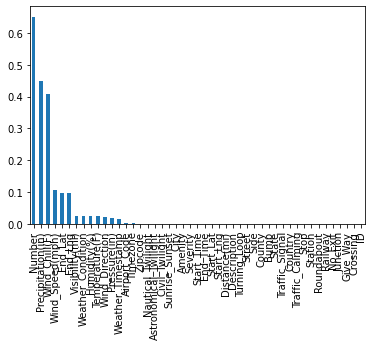

In [19]:
## to check the missing values percentage in plots

missing_percentage.plot(kind='bar')

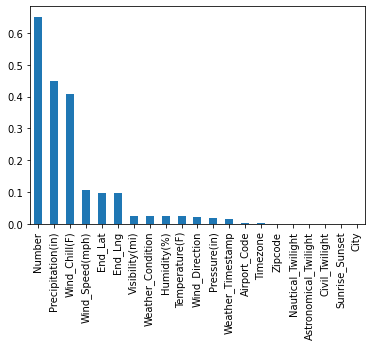

In [20]:
# In the above graph it si very difficult to read as there are lot of columns 
# so to tackle this we are filtering out the columns which has missing percentage and plot it

missing_percentage[missing_percentage != 0].plot(kind='bar')
#missing_percentage.plot[Kind ='bar']





# Remove columns that we do not want to use

In [21]:
df.columns

Index(['ID', 'Severity', 'Start_Time', 'End_Time', 'Start_Lat', 'Start_Lng',
       'End_Lat', 'End_Lng', 'Distance(mi)', 'Description', 'Number', 'Street',
       'Side', 'City', 'County', 'State', 'Zipcode', 'Country', 'Timezone',
       'Airport_Code', 'Weather_Timestamp', 'Temperature(F)', 'Wind_Chill(F)',
       'Humidity(%)', 'Pressure(in)', 'Visibility(mi)', 'Wind_Direction',
       'Wind_Speed(mph)', 'Precipitation(in)', 'Weather_Condition', 'Amenity',
       'Bump', 'Crossing', 'Give_Way', 'Junction', 'No_Exit', 'Railway',
       'Roundabout', 'Station', 'Stop', 'Traffic_Calming', 'Traffic_Signal',
       'Turning_Loop', 'Sunrise_Sunset', 'Civil_Twilight', 'Nautical_Twilight',
       'Astronomical_Twilight'],
      dtype='object')

# Ask Question and Answers

1. Are there more accidents in colder areas or hotter areas ?
2. Which 5 states have the highest number of accidents ? how about per capita ?
3. Does Newyork showup in data . if yes why is the count lower in the most populated city.
4. Among the cities , how many cities are having more accidents ?
5. What time of the day have more accidents ?
6. which days of the week have the more accident ?
7. which months have the most accidents ?
8. what is the trend of accidents year over year  ( decreasing or increasing )


Columns to analyse

1. Weather condition
2. City
3. Start time
4. Temperature
5. Start time, Start longitude


## City

In [22]:
# to identify different citites 

df.City
df.City.unique()

len(df.City.unique())

11790

In [23]:
# Calculate no. of accidents by cities
Cities_by_accident= df.City.value_counts()
print(Cities_by_accident)

Los Angeles            68411
Houston                68265
Charlotte              56176
Miami                  49965
Dallas                 48525
                       ...  
Rensselaer Falls           1
Tilleda                    1
San Fernando Valley        1
Swifton                    1
Masury                     1
Name: City, Length: 11789, dtype: int64


In [24]:
# to check the top 20 cities 

Cities_by_accident[:20]

Los Angeles      68411
Houston          68265
Charlotte        56176
Miami            49965
Dallas           48525
Austin           38808
Raleigh          31355
Atlanta          29244
Sacramento       28984
Orlando          28092
Nashville        25277
Baton Rouge      25080
Minneapolis      22469
San Diego        22329
Phoenix          21370
Oklahoma City    21292
Portland         19432
Richmond         18343
Seattle          17384
Saint Paul       17266
Name: City, dtype: int64

In [25]:
# To check if Neywork exists in columns

'New York' in df.City



False

In [26]:
# check the NY state in State column

'NY' in df.State

False

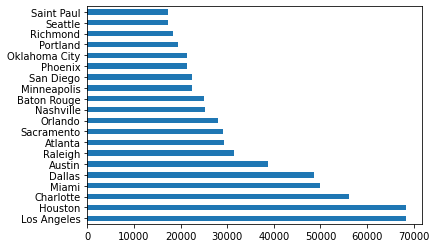

In [27]:
Cities_by_accident[:20].plot(kind='barh')

In [28]:
import matplotlib.pyplot as plt

import seaborn as sns
sns.set_style('darkgrid')


(array([7., 3., 4., 0., 1., 0., 2., 1., 0., 2.]),
 array([17266. , 22380.5, 27495. , 32609.5, 37724. , 42838.5, 47953. ,
        53067.5, 58182. , 63296.5, 68411. ]),
 <a list of 10 Patch objects>)

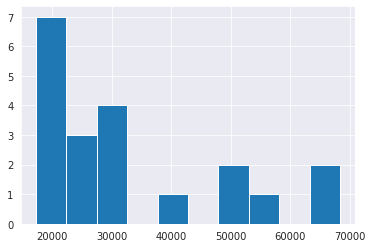

In [29]:
# to see the histplot using matplot library
plt.hist(Cities_by_accident[:20])

In [30]:
# Creating two buckets one with high and other low accident cities

high_accident_cities= Cities_by_accident[Cities_by_accident > 1000]
low_accident_cities= Cities_by_accident[Cities_by_accident <= 1000]

len(high_accident_cities)
#len(low_accident_cities)

513

In [31]:
len(low_accident_cities)

11276

In [32]:
# Percentage of High and Low accident citites

low_perc_cities=(len(high_accident_cities)/len(df.City.unique()))*100
print(low_perc_cities)

4.351145038167939


In [33]:
low_perc_cities=(len(low_accident_cities)/len(df.City.unique()))*100
print(low_perc_cities)

95.64037319762511


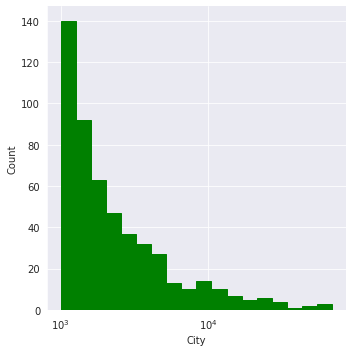

In [34]:
sns.displot(high_accident_cities,kind='hist',Color='Green',log_scale=True,legend=True)

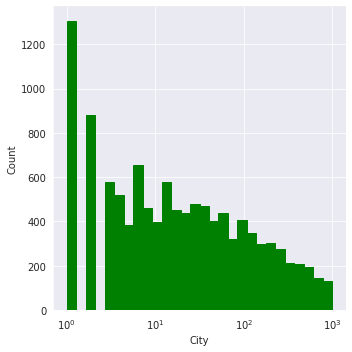

In [35]:
sns.displot(low_accident_cities,kind='hist',Color='Green',log_scale=True,legend=True)

In [36]:
    Cities_by_accident[Cities_by_accident == 1]
    

City Of Spokane Valley    1
Camp Meeker               1
Wardsboro                 1
Margate City              1
Alloway                   1
                         ..
Rensselaer Falls          1
Tilleda                   1
San Fernando Valley       1
Swifton                   1
Masury                    1
Name: City, Length: 1306, dtype: int64

#Summary and Conclusion
Insights
- No data for New York.
- Less than 5% of the cities have mre than 1000 yearly accidents
- Over 1200 cities have just one accident so need some investigation
-The number of accidents per city decreases or uincreases exponentially 


### Start time

In [37]:
df.Start_Time[0]

'2019-05-21 08:29:55'

In [38]:
#pd.to_datetime(df.Start_Time)
df.Start_Time=pd.to_datetime(df.Start_Time)

In [39]:
print(df.Start_Time)

0         2019-05-21 08:29:55
1         2019-10-07 17:43:09
2         2020-12-13 21:53:00
3         2018-04-17 16:51:23
4         2016-08-31 17:40:49
                  ...        
2906605   2018-06-28 08:49:01
2906606   2019-01-10 02:01:01
2906607   2020-11-23 12:52:00
2906608   2019-12-29 22:38:00
2906609   2018-03-26 13:35:03
Name: Start_Time, Length: 2906610, dtype: datetime64[ns]


In [40]:
# to view the hour of the day of accident start time

df.Start_Time.dt.hour


0           8
1          17
2          21
3          16
4          17
           ..
2906605     8
2906606     2
2906607    12
2906608    22
2906609    13
Name: Start_Time, Length: 2906610, dtype: int64

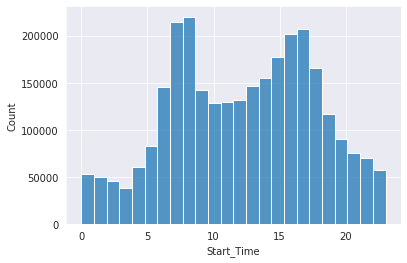

In [41]:
sns.histplot(df.Start_Time.dt.hour, bins=24)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


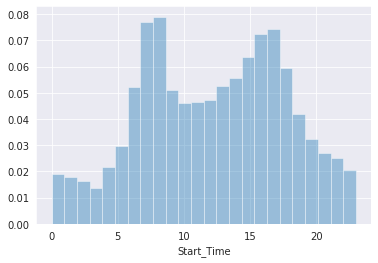

In [42]:
# to add percentages on top of hist bar plots

sns.distplot(df.Start_Time.dt.hour, bins=24 , kde=False, norm_hist=True)


- High percentage of accidents occur between 6 am to 9 am as more number of people leaving for class or office
- Again from 3 pm to 6 pm is also a accident time zone




/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


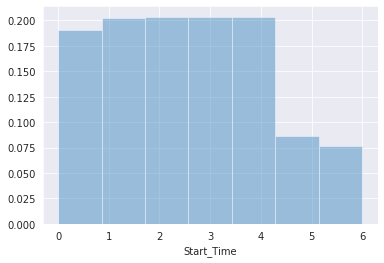

In [43]:
# to identify whcih day of the week there is more accident
sns.distplot(df.Start_Time.dt.dayofweek, bins=7, kde=False, norm_hist=True)

- On weekdays we have more accidents compared to weekends 
- Also check whether the peak time of accident during weekend is same as weekdays

In [44]:
saturday_start_time=df.Start_Time[df.Start_Time.dt.dayofweek==6]

In [45]:
sunday_start_time=df.Start_Time[df.Start_Time.dt.dayofweek==5]

- Saturday peak time of accident


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


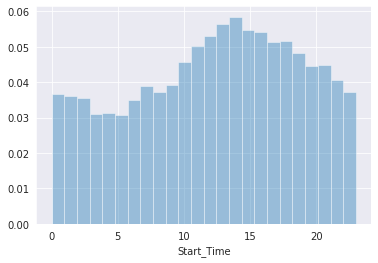

In [46]:
sns.distplot(saturday_start_time.dt.hour, bins=24 , kde=False, norm_hist=True)

- Sunday  peak time of accident


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


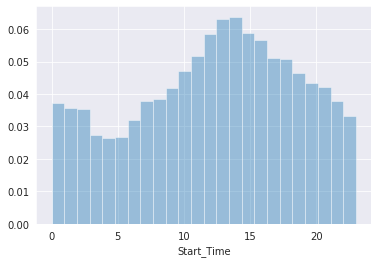

In [47]:
sns.distplot(sunday_start_time.dt.hour, bins=24 , kde=False, norm_hist=True)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


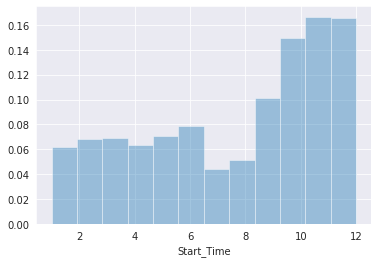

In [48]:
sns.distplot(sunday_start_time.dt.month, bins=12 , kde=False, norm_hist=True)

In [49]:
#Can you explain the month wise trend of the accident
#below is the analysis and when we check below it is due to much of data missing in 2016 and 2017
#Data from source is creating the issue. Mapquet is having good data whereas not from Bing

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


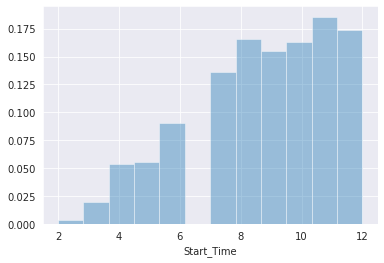

In [50]:
df_year= df[df.Start_Time.dt.year==2016]
sns.distplot(df_year.Start_Time.dt.month,bins=12,kde=False,norm_hist=True)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


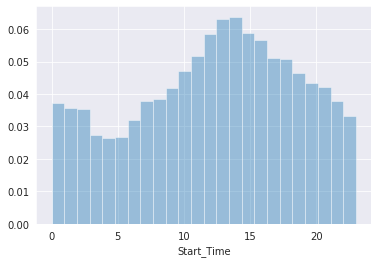

In [51]:
df_year=df[df.Start_Time.dt.year==2017]
sns.distplot(sunday_start_time.dt.hour, bins=24 , kde=False, norm_hist=True)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


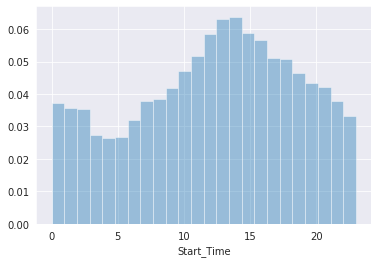

In [52]:
df_year=df[df.Start_Time.dt.year==2018]
sns.distplot(sunday_start_time.dt.hour, bins=24 , kde=False, norm_hist=True)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


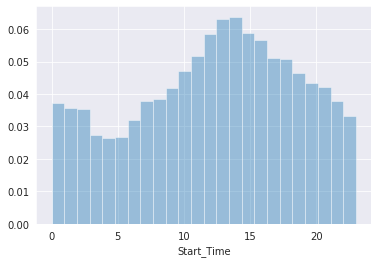

In [53]:
df_year=df[df.Start_Time.dt.year==2019]
sns.distplot(sunday_start_time.dt.hour, bins=24 , kde=False, norm_hist=True)

In [55]:
df.Give_Way.value_counts()

False    2898390
True        8220
Name: Give_Way, dtype: int64

In [56]:
# Start lattitude and Longitude

In [57]:
df.Start_Lat

0          34.808868
1          35.090080
2          37.145730
3          39.110390
4          26.102942
             ...    
2906605    29.813824
2906606    34.068890
2906607    25.702200
2906608    40.660140
2906609    38.831749
Name: Start_Lat, Length: 2906610, dtype: float64

In [58]:
df.Start_Lng

0          -82.269157
1          -80.745560
2         -121.985052
3         -119.773781
4          -80.265091
              ...    
2906605    -95.399437
2906606   -117.342010
2906607    -80.335556
2906608   -111.952460
2906609   -104.748161
Name: Start_Lng, Length: 2906610, dtype: float64

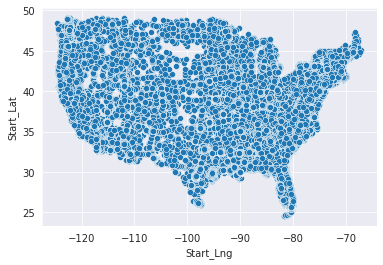

In [59]:
sns.scatterplot(x=df.Start_Lng, y=df.Start_Lat)

In [62]:
# reduce the size of the points
sns.scatterplot(x=df.Start_Lng, y=df.Start_Lat,size=0.001)

Error in callback <function flush_figures at 0x7f4005950440> (for post_execute):


KeyboardInterrupt: ignored

In [63]:
import folium

In [68]:
folium.Map()

In [69]:
lat ,lon =df.Start_Lat[0],df.Start_Lng[0]

In [71]:
map=folium.Map()
marker=folium.Marker((lat,lon))
marker.add_to(map)
map

In [73]:
for x in df[['Start_Lat','Start_Lng']].sample(100).iteritems():
  print(x[1])


587583     26.318445
1400204    38.354944
862818     28.484215
775267     38.879310
2460861    39.230278
             ...    
1185729    33.193634
2888733    26.136276
436127     35.844145
2087154    38.030580
2662649    37.409291
Name: Start_Lat, Length: 100, dtype: float64
587583     -80.116196
1400204    -77.510996
862818     -81.396683
775267    -111.928670
2460861    -84.633980
              ...    
1185729   -117.364894
2888733    -80.186569
436127     -78.680541
2087154    -78.659759
2662649   -121.892458
Name: Start_Lng, Length: 100, dtype: float64


In [77]:
from folium.plugins import HeatMap

In [78]:
  # to convert the lat and long to list with values x and y
  


[(34.808868, -82.26915699999998),
 (35.09008, -80.74556),
 (37.14573, -121.985052),
 (39.11039, -119.773781),
 (26.102942, -80.265091),
 (35.34824000000001, -80.84722099999998),
 (39.52397, -107.777),
 (34.034017, -118.026972),
 (35.86349000000001, -86.83168),
 (34.42633, -118.5851),
 (28.021709, -82.203583),
 (40.91221, -73.875099),
 (32.86693, -96.66617),
 (32.265141, -110.90358700000002),
 (41.05982, -74.25092),
 (29.723339000000006, -95.497337),
 (34.103172, -118.249969),
 (34.186595000000004, -117.439427),
 (42.501929, -82.918056),
 (41.556862, -73.779556),
 (33.918056, -84.33802800000002),
 (35.596561, -78.759743),
 (29.640491, -95.482445),
 (37.40691, -79.913933),
 (40.9122, -73.88461),
 (37.994461, -122.069885),
 (32.87109, -80.010628),
 (30.426109000000004, -97.753906),
 (33.774159000000004, -118.049783),
 (43.22039, -85.500961),
 (25.684458, -80.445924),
 (43.003693, -78.412064),
 (39.922646, -86.11689),
 (30.420996, -91.140549),
 (35.23932999999999, -80.856415),
 (35.05473, 

In [ ]:
sample_df=df.sample(int(0.1)*len(df))
lat_lon_pairs=list(zip(list(df.Start_Lat),list(df.Start_Lng)))

In [84]:
map=folium.Map()
HeatMap( lat_lon_pairs).add_to(map)
map